## Importing tools

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
import lazypredict
%matplotlib inline 

# Models from Scikit-Learn
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

# Model for Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import RocCurveDisplay
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

### About Dataset
This is a [dataset](https://www.kaggle.com/datasets/deepu1109/star-dataset) consisting of several features of **stars**.

Some of them are:

* Absolute Temperature `(in K)`
* Relative Luminosity `(L/Lo)`
* Relative Radius `(R/Ro)`
* Absolute Magnitude `(Mv)`
* Star Color `(white,Red,Blue,Yellow,yellow-orange etc)`
* Spectral Class `(O,B,A,F,G,K,,M)`
* Star Type **`(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)`**

`Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)`\
`Ro = 6.9551 x 10^8 m (Avg Radius of Sun)`

In [2]:
df = pd.read_csv("6 class csv.csv")
df.shape

(240, 7)

## Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [4]:
# Check for any missing values
df.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [5]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.00,240.00,240.00,240.00,240.00
mean,10497.46,107188.36,237.16,4.38,2.50
std,9552.43,179432.24,517.16,10.53,1.71
min,1939.00,0.00,0.01,-11.92,0.00
25%,3344.25,0.00,0.10,-6.23,1.00
50%,5776.00,0.07,0.76,8.31,2.50
75%,15055.50,198050.00,42.75,13.70,4.00
max,40000.00,849420.00,1948.50,20.06,5.00


In [6]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.00,0.17,16.12,0,Red,M
1,3042,0.00,0.15,16.60,0,Red,M
2,2600,0.00,0.10,18.70,0,Red,M
3,2800,0.00,0.16,16.65,0,Red,M
4,1939,0.00,0.10,20.06,0,Red,M


### Class Balance
A **problem** may arise when the number of instances in each `class` of a `dataset` is not balanced. This has a significant impact on the performance of **machine learning models**. The `models` trained on such data tend to be biased towards the `majority class`.

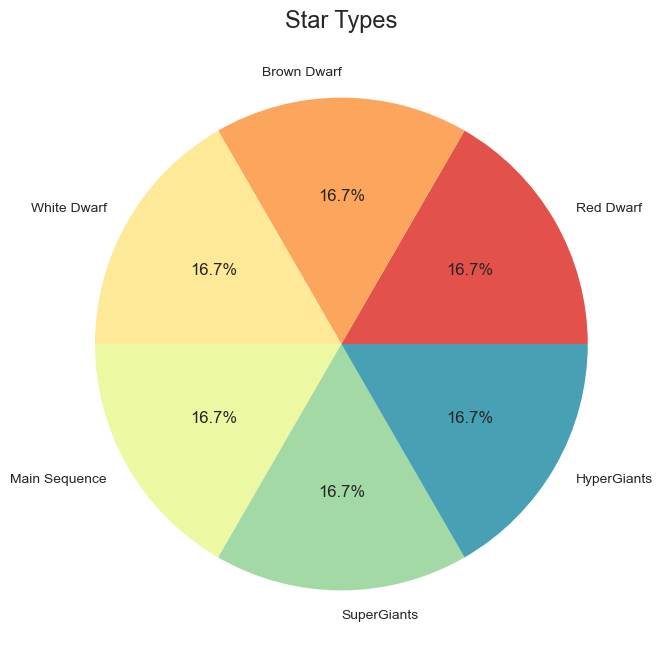

In [7]:
# Star Types
labels = ["Red Dwarf", "Brown Dwarf", "White Dwarf", "Main Sequence", "SuperGiants", "HyperGiants"]
sizes = df["Star type"].value_counts().values
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, colors=sns.color_palette("Spectral"), autopct='%1.1f%%')
plt.title('Star Types',fontsize = 17);

It appears that the **data** in this case is 
perfectly `balanced.`

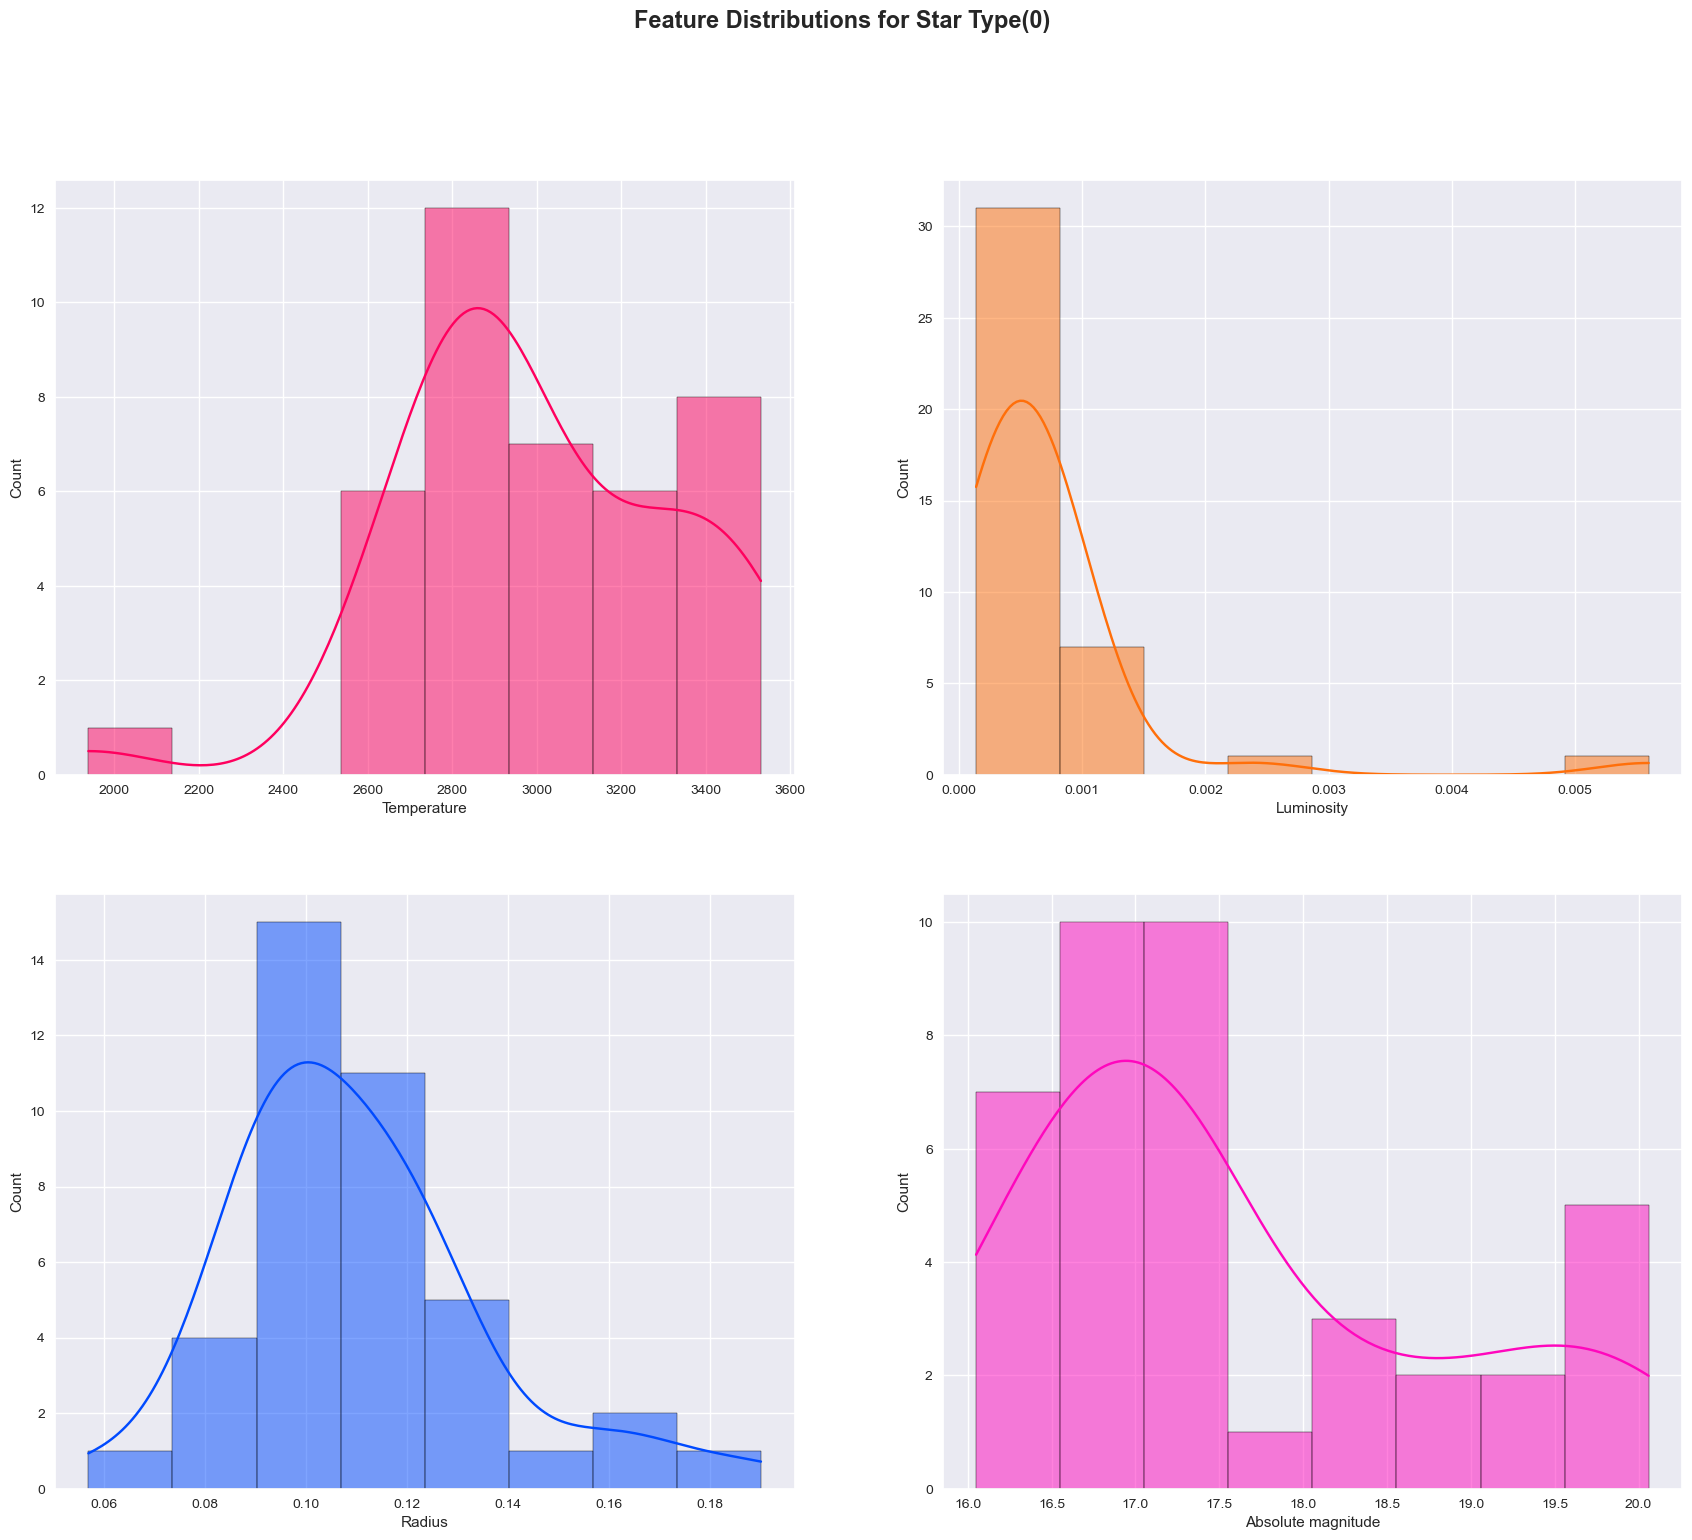

In [8]:
#Choose a style for the plot
sns.set_style('darkgrid')

# Create a figure and axes with 1 row and 3 columns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(21, 17))

sns.histplot(x=df[df["Star type"] == 0]["Temperature (K)"], color='#FF005E', edgecolor='black', bins=8, kde=True, ax=ax[0][0])
ax[0][0].set_xlabel('Temperature')
ax[0][0].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 0]["Luminosity(L/Lo)"], color='#ff6f0a', edgecolor='black', bins=8, kde=True, ax=ax[0][1])
ax[0][1].set_xlabel('Luminosity')
ax[0][1].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 0]["Radius(R/Ro)"], color='#004aff', edgecolor='black', bins=8, kde=True, ax=ax[1][0])
ax[1][0].set_xlabel('Radius')
ax[1][0].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 0]["Absolute magnitude(Mv)"], color='#ff07bd', edgecolor='black', bins=8, kde=True, ax=ax[1][1])
ax[1][1].set_xlabel('Absolute magnitude')
ax[1][1].set_ylabel('Count')

fig.suptitle("Feature Distributions for Star Type(0)", fontsize=17, fontweight="bold");

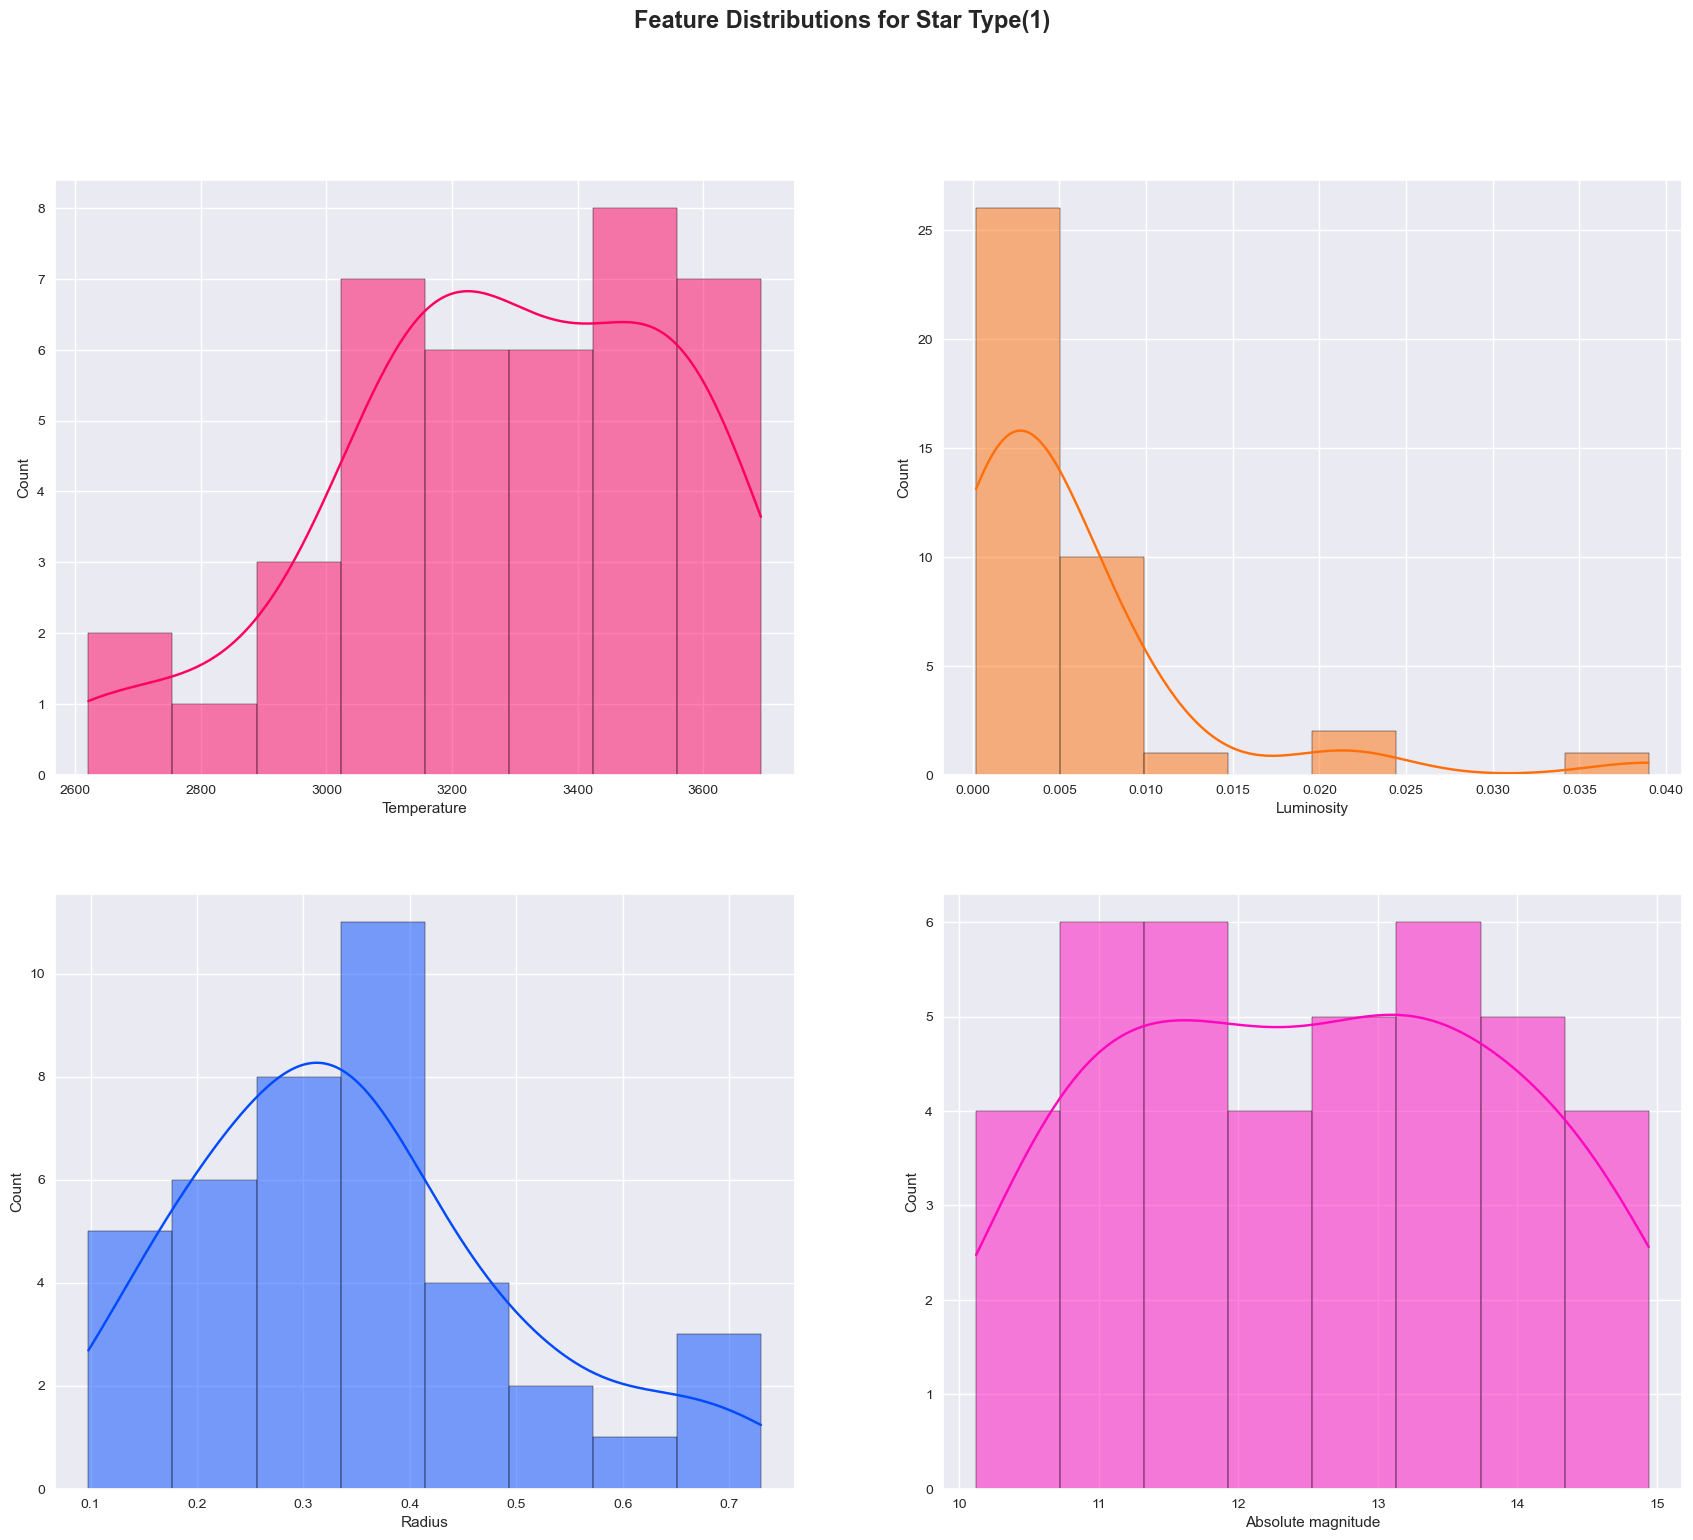

In [9]:
#Choose a style for the plot
sns.set_style('darkgrid')

# Create a figure and axes with 1 row and 3 columns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(21, 17))

sns.histplot(x=df[df["Star type"] == 1]["Temperature (K)"], color='#FF005E', edgecolor='black', bins=8, kde=True, ax=ax[0][0])
ax[0][0].set_xlabel('Temperature')
ax[0][0].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 1]["Luminosity(L/Lo)"], color='#ff6f0a', edgecolor='black', bins=8, kde=True, ax=ax[0][1])
ax[0][1].set_xlabel('Luminosity')
ax[0][1].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 1]["Radius(R/Ro)"], color='#004aff', edgecolor='black', bins=8, kde=True, ax=ax[1][0])
ax[1][0].set_xlabel('Radius')
ax[1][0].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 1]["Absolute magnitude(Mv)"], color='#ff07bd', edgecolor='black', bins=8, kde=True, ax=ax[1][1])
ax[1][1].set_xlabel('Absolute magnitude')
ax[1][1].set_ylabel('Count')

fig.suptitle("Feature Distributions for Star Type(1)", fontsize=17, fontweight="bold");

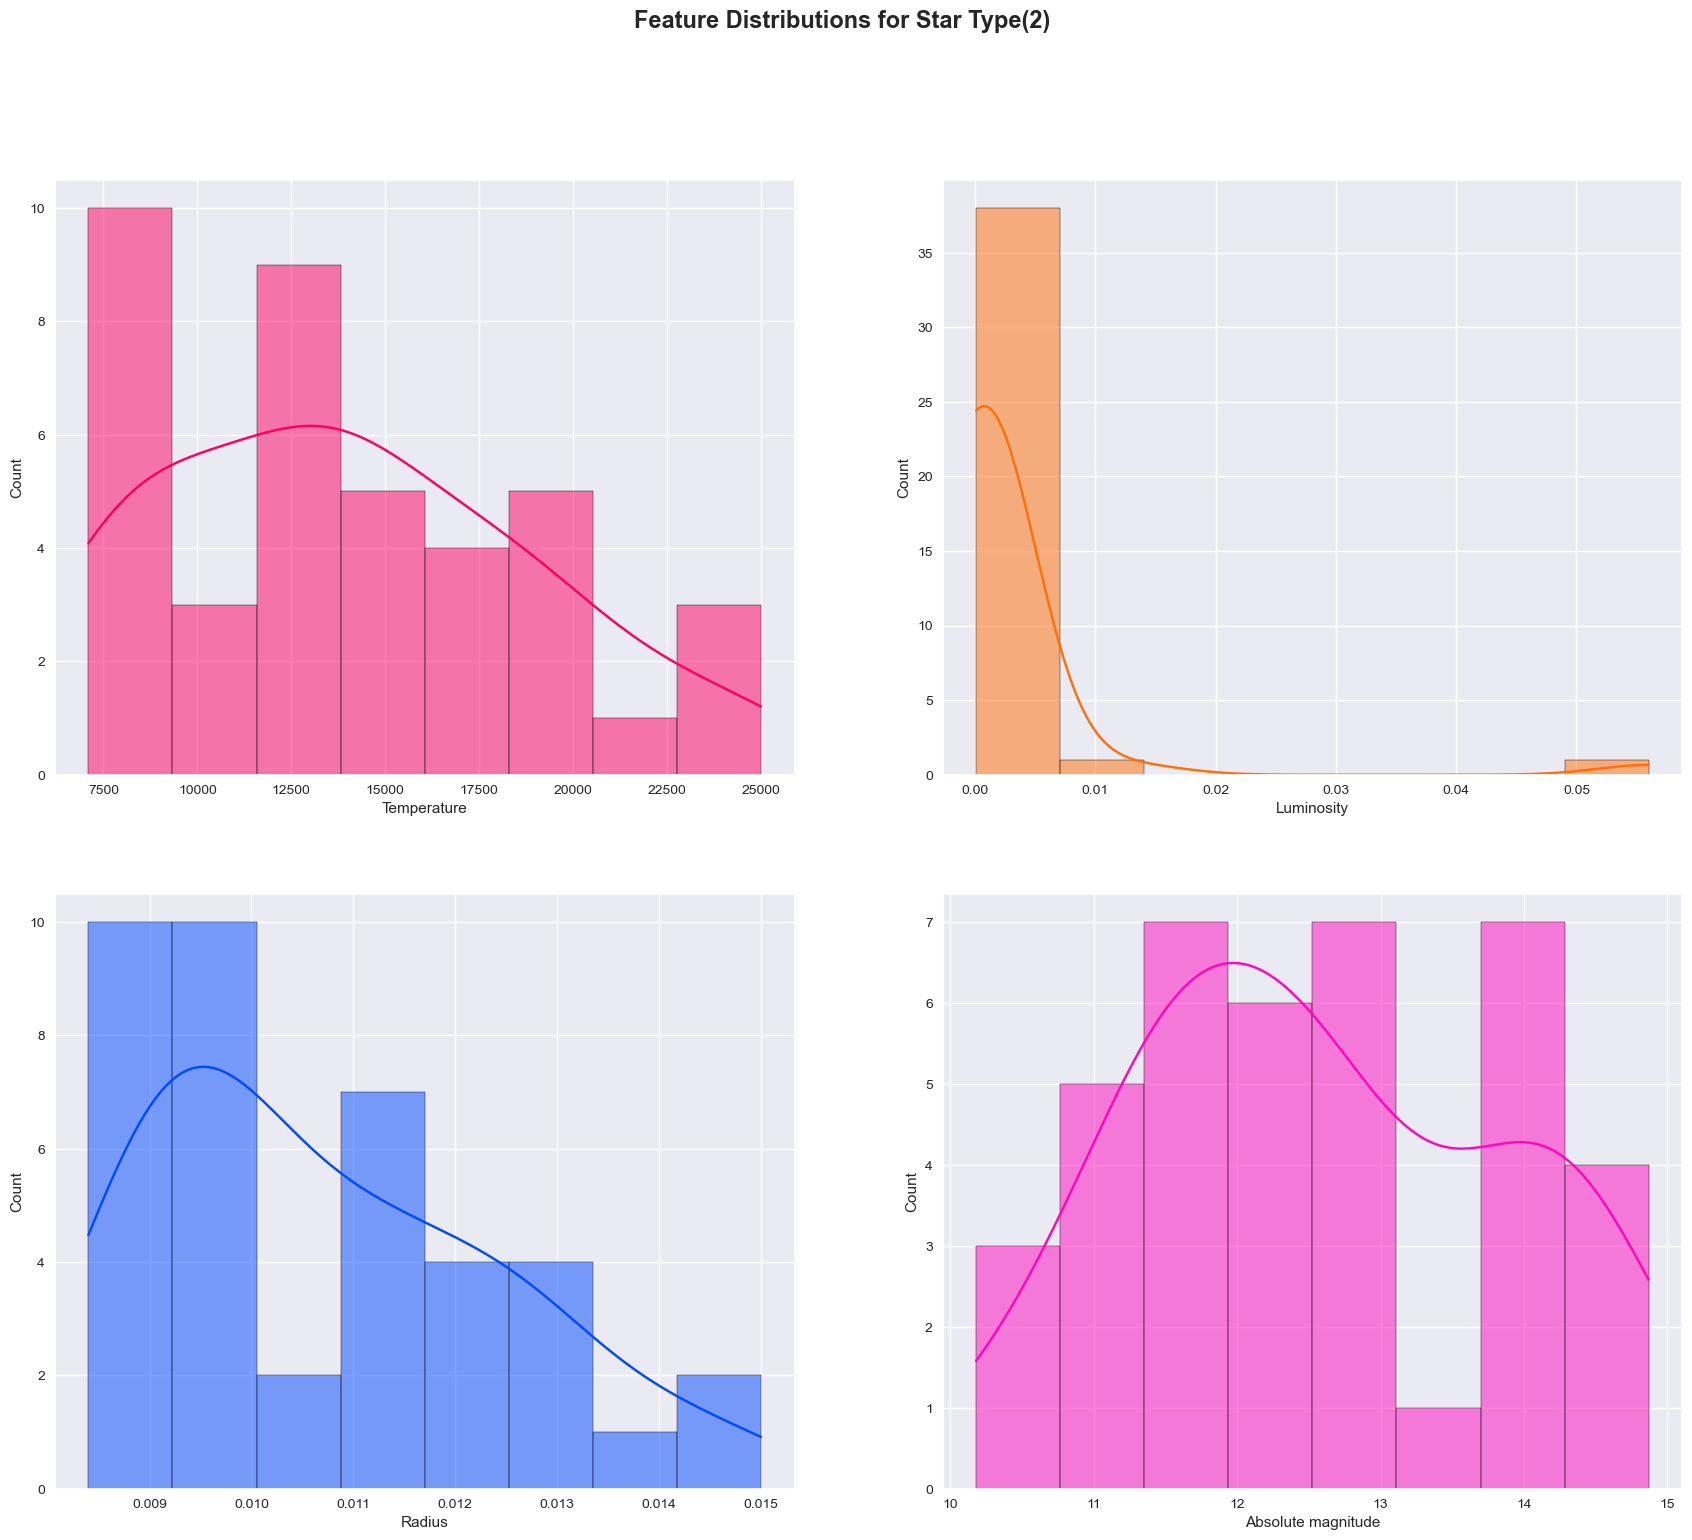

In [10]:
#Choose a style for the plot
sns.set_style('darkgrid')

# Create a figure and axes with 1 row and 3 columns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(21, 17))

sns.histplot(x=df[df["Star type"] == 2]["Temperature (K)"], color='#FF005E', edgecolor='black', bins=8, kde=True, ax=ax[0][0])
ax[0][0].set_xlabel('Temperature')
ax[0][0].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 2]["Luminosity(L/Lo)"], color='#ff6f0a', edgecolor='black', bins=8, kde=True, ax=ax[0][1])
ax[0][1].set_xlabel('Luminosity')
ax[0][1].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 2]["Radius(R/Ro)"], color='#004aff', edgecolor='black', bins=8, kde=True, ax=ax[1][0])
ax[1][0].set_xlabel('Radius')
ax[1][0].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 2]["Absolute magnitude(Mv)"], color='#ff07bd', edgecolor='black', bins=8, kde=True, ax=ax[1][1])
ax[1][1].set_xlabel('Absolute magnitude')
ax[1][1].set_ylabel('Count')

fig.suptitle("Feature Distributions for Star Type(2)", fontsize=17, fontweight="bold");

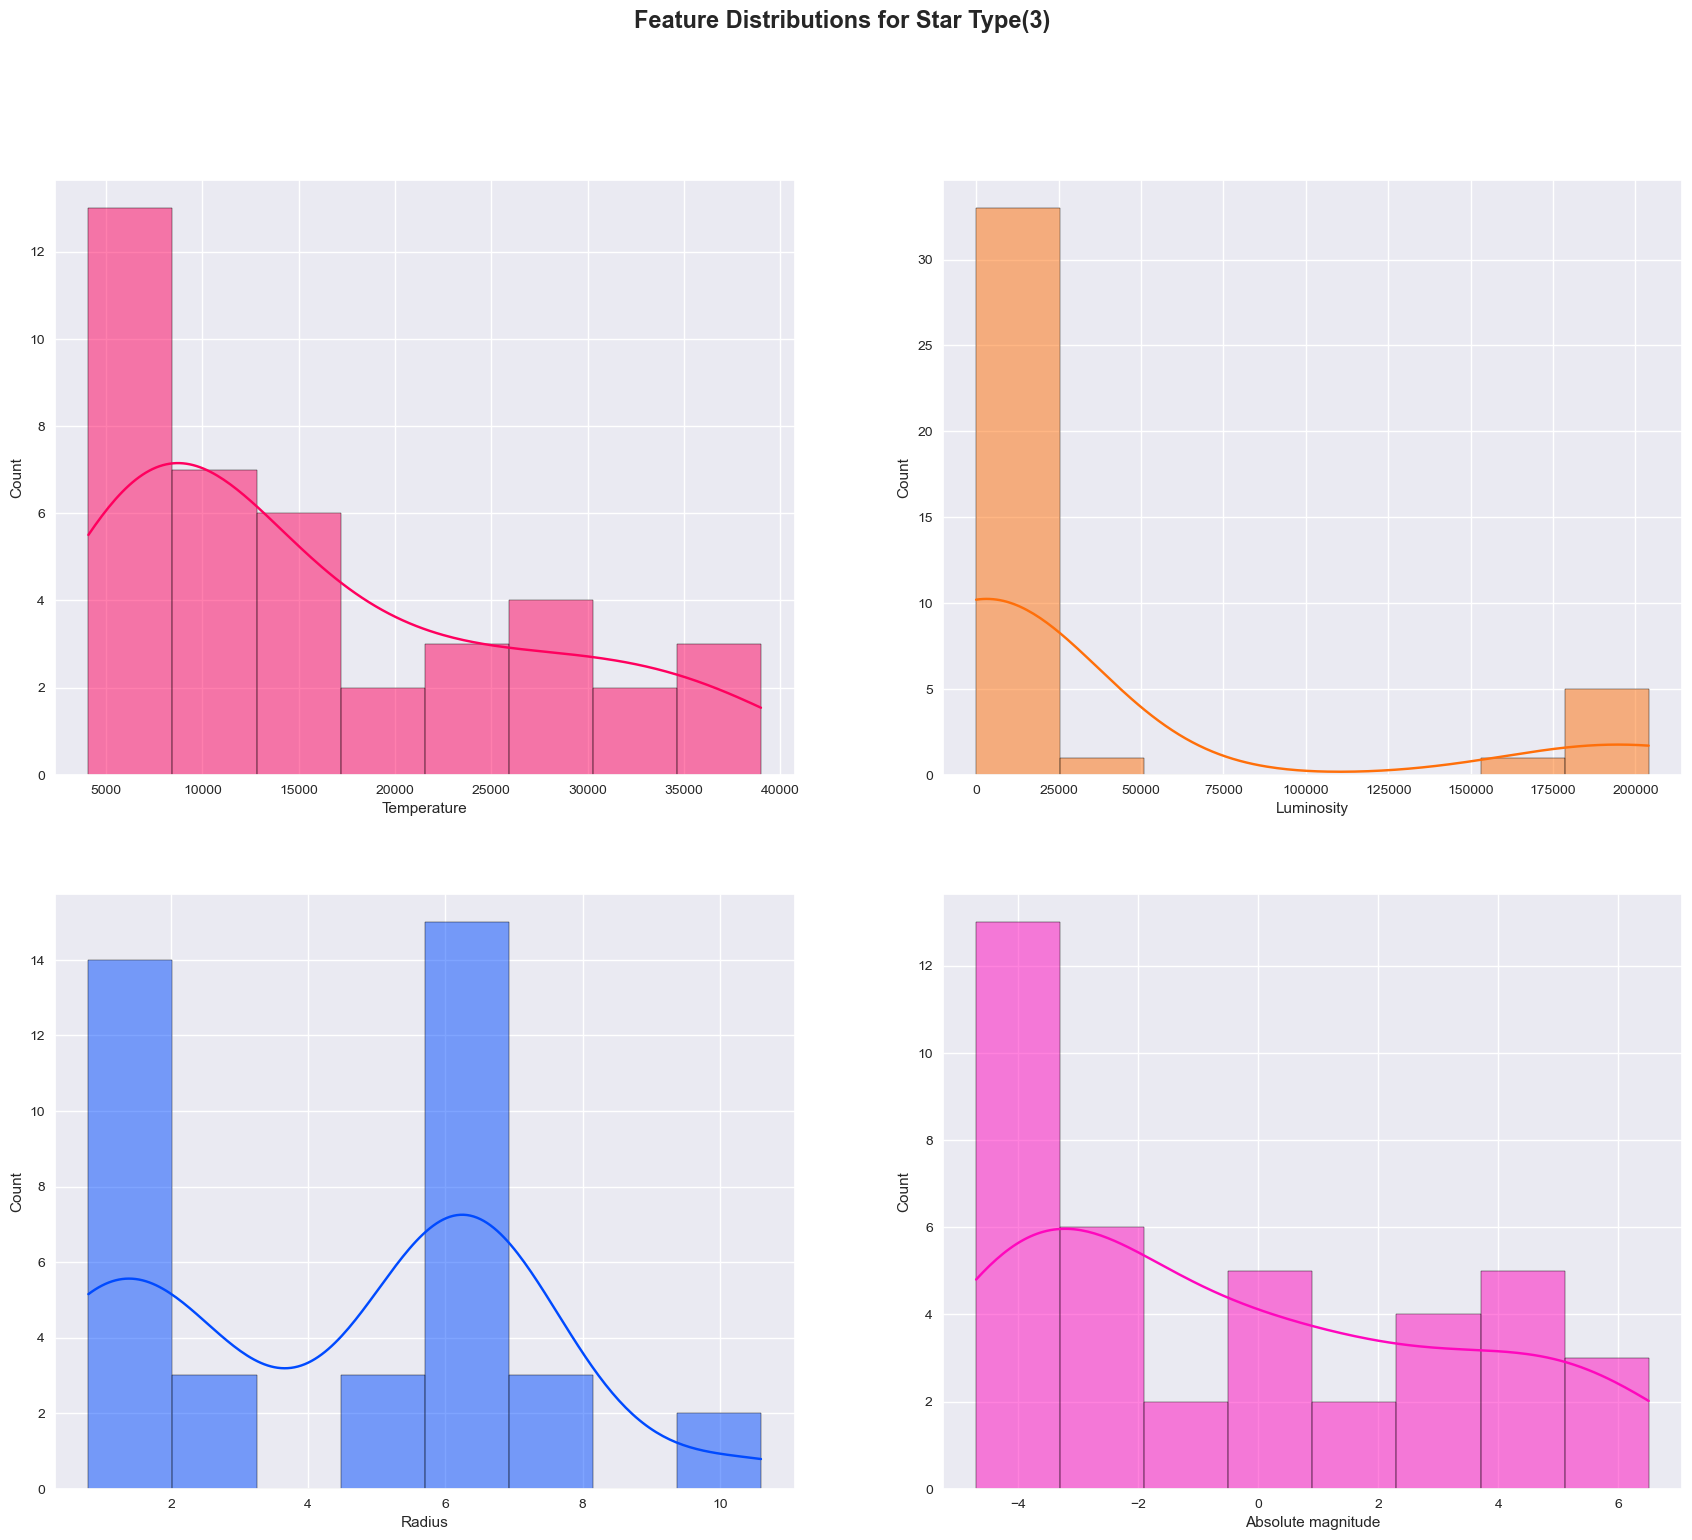

In [11]:
#Choose a style for the plot
sns.set_style('darkgrid')

# Create a figure and axes with 1 row and 3 columns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(21, 17))

sns.histplot(x=df[df["Star type"] == 3]["Temperature (K)"], color='#FF005E', edgecolor='black', bins=8, kde=True, ax=ax[0][0])
ax[0][0].set_xlabel('Temperature')
ax[0][0].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 3]["Luminosity(L/Lo)"], color='#ff6f0a', edgecolor='black', bins=8, kde=True, ax=ax[0][1])
ax[0][1].set_xlabel('Luminosity')
ax[0][1].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 3]["Radius(R/Ro)"], color='#004aff', edgecolor='black', bins=8, kde=True, ax=ax[1][0])
ax[1][0].set_xlabel('Radius')
ax[1][0].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 3]["Absolute magnitude(Mv)"], color='#ff07bd', edgecolor='black', bins=8, kde=True, ax=ax[1][1])
ax[1][1].set_xlabel('Absolute magnitude')
ax[1][1].set_ylabel('Count')

fig.suptitle("Feature Distributions for Star Type(3)", fontsize=17, fontweight="bold");

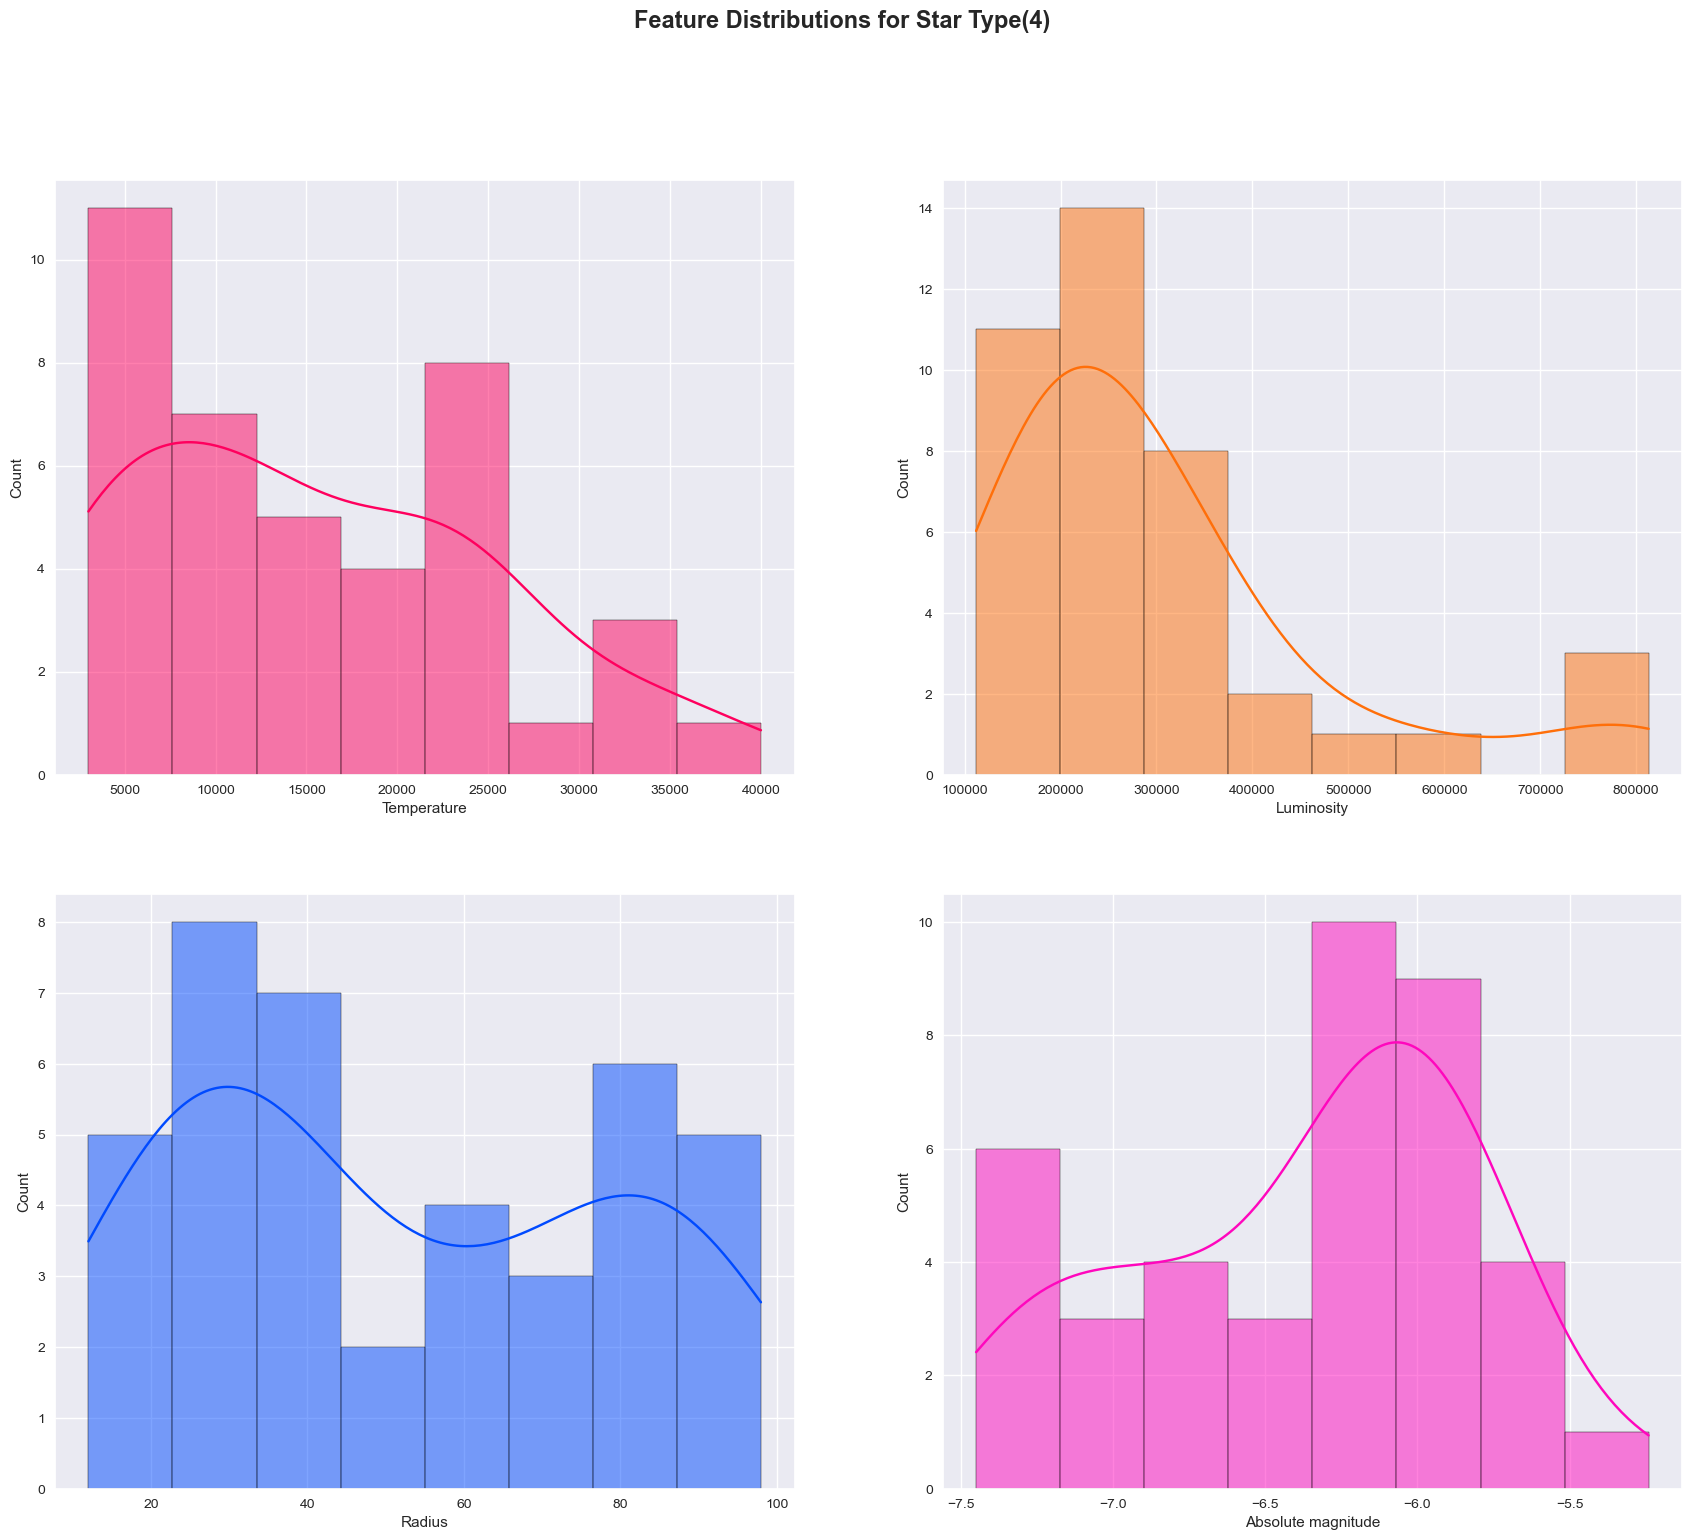

In [12]:
#Choose a style for the plot
sns.set_style('darkgrid')

# Create a figure and axes with 1 row and 3 columns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(21, 17))

sns.histplot(x=df[df["Star type"] == 4]["Temperature (K)"], color='#FF005E', edgecolor='black', bins=8, kde=True, ax=ax[0][0])
ax[0][0].set_xlabel('Temperature')
ax[0][0].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 4]["Luminosity(L/Lo)"], color='#ff6f0a', edgecolor='black', bins=8, kde=True, ax=ax[0][1])
ax[0][1].set_xlabel('Luminosity')
ax[0][1].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 4]["Radius(R/Ro)"], color='#004aff', edgecolor='black', bins=8, kde=True, ax=ax[1][0])
ax[1][0].set_xlabel('Radius')
ax[1][0].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 4]["Absolute magnitude(Mv)"], color='#ff07bd', edgecolor='black', bins=8, kde=True, ax=ax[1][1])
ax[1][1].set_xlabel('Absolute magnitude')
ax[1][1].set_ylabel('Count')

fig.suptitle("Feature Distributions for Star Type(4)", fontsize=17, fontweight="bold");

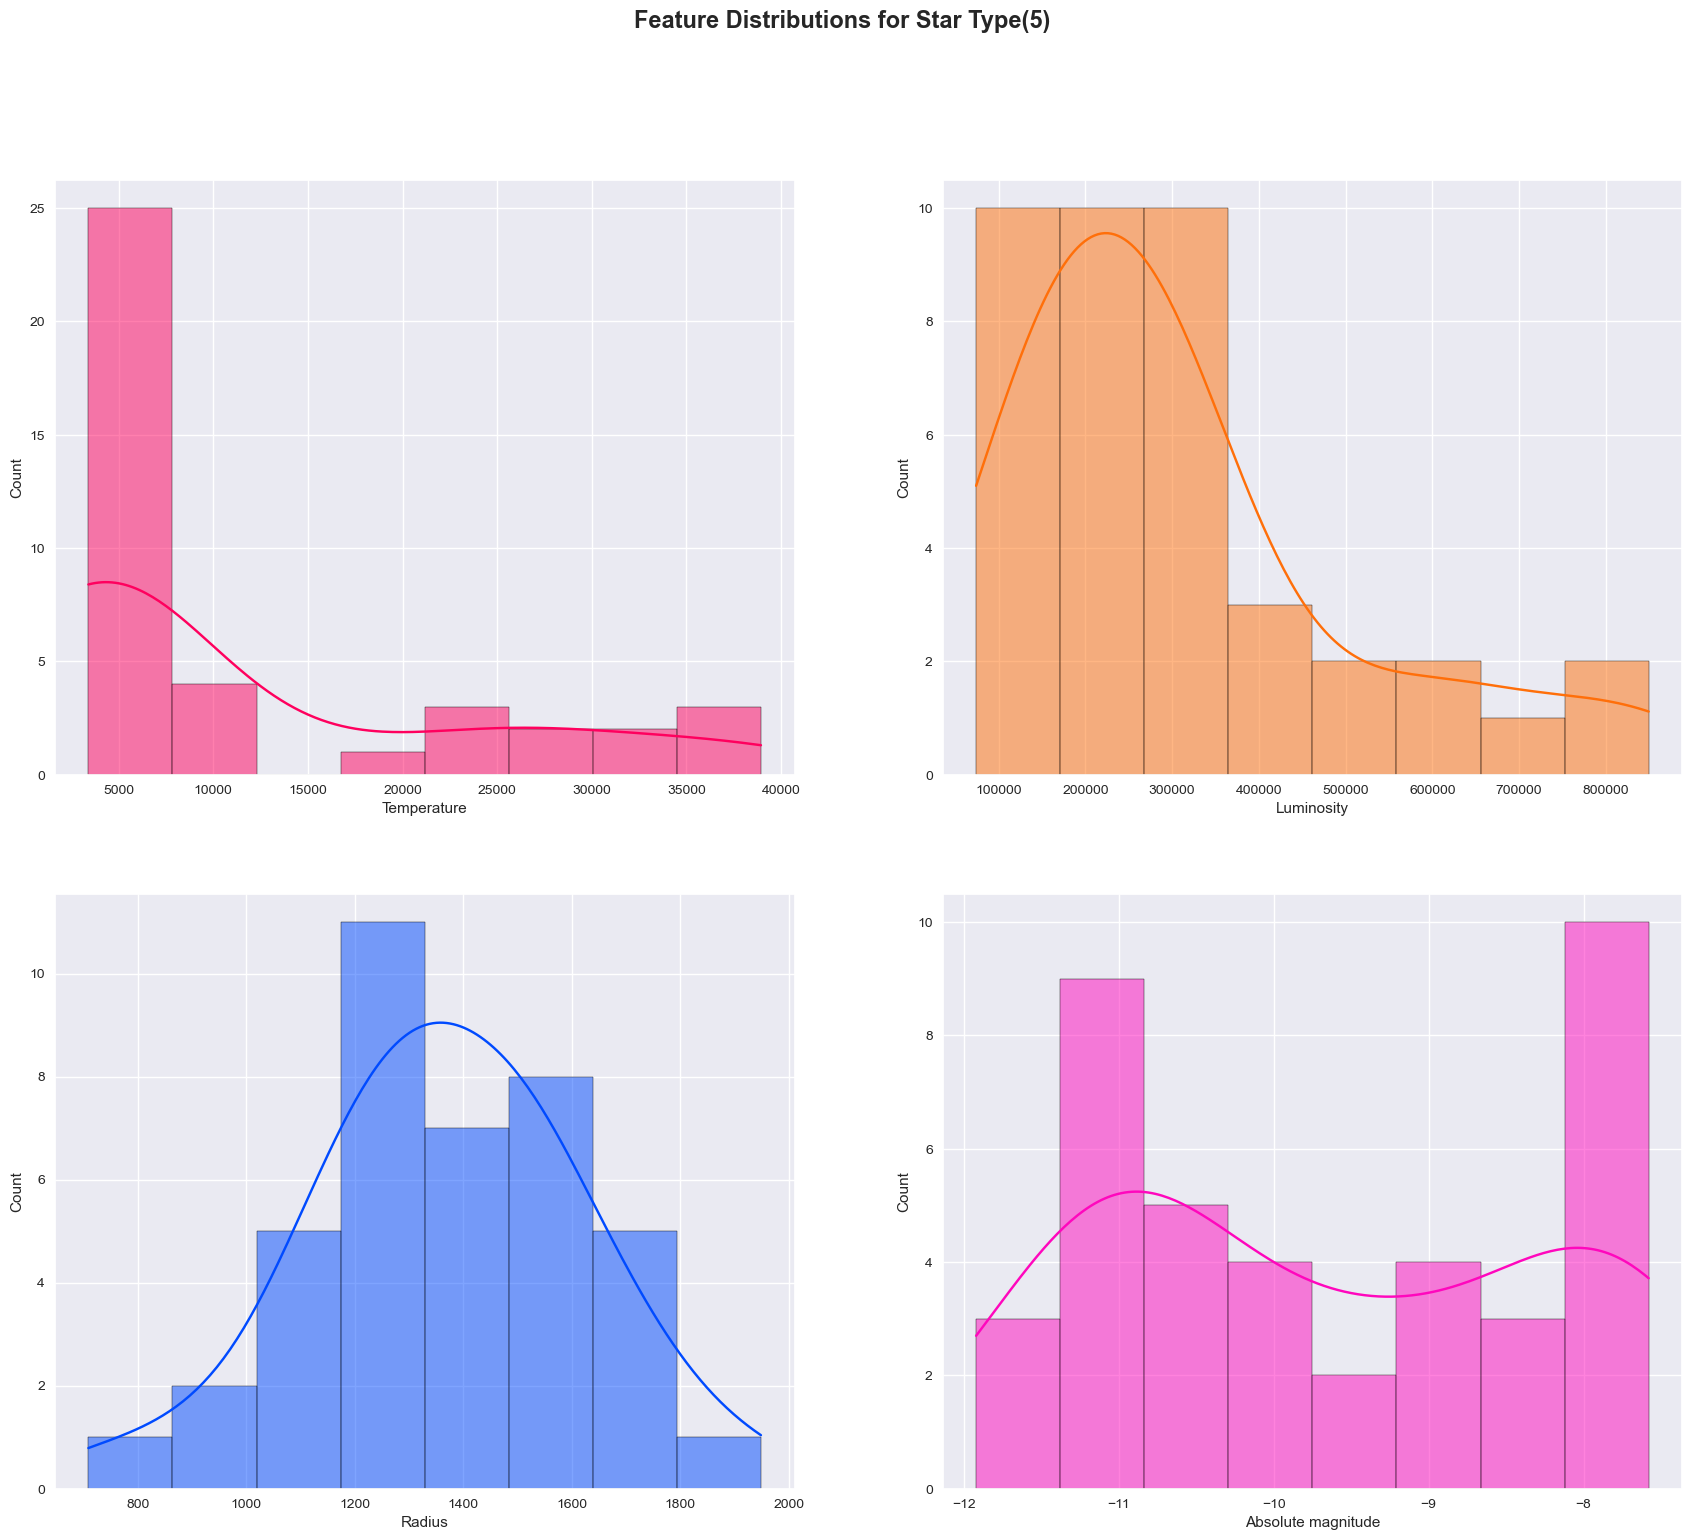

In [13]:
#Choose a style for the plot
sns.set_style('darkgrid')

# Create a figure and axes with 1 row and 3 columns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(21, 17))

sns.histplot(x=df[df["Star type"] == 5]["Temperature (K)"], color='#FF005E', edgecolor='black', bins=8, kde=True, ax=ax[0][0])
ax[0][0].set_xlabel('Temperature')
ax[0][0].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 5]["Luminosity(L/Lo)"], color='#ff6f0a', edgecolor='black', bins=8, kde=True, ax=ax[0][1])
ax[0][1].set_xlabel('Luminosity')
ax[0][1].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 5]["Radius(R/Ro)"], color='#004aff', edgecolor='black', bins=8, kde=True, ax=ax[1][0])
ax[1][0].set_xlabel('Radius')
ax[1][0].set_ylabel('Count')

sns.histplot(x=df[df["Star type"] == 5]["Absolute magnitude(Mv)"], color='#ff07bd', edgecolor='black', bins=8, kde=True, ax=ax[1][1])
ax[1][1].set_xlabel('Absolute magnitude')
ax[1][1].set_ylabel('Count')

fig.suptitle("Feature Distributions for Star Type(5)", fontsize=17, fontweight="bold");

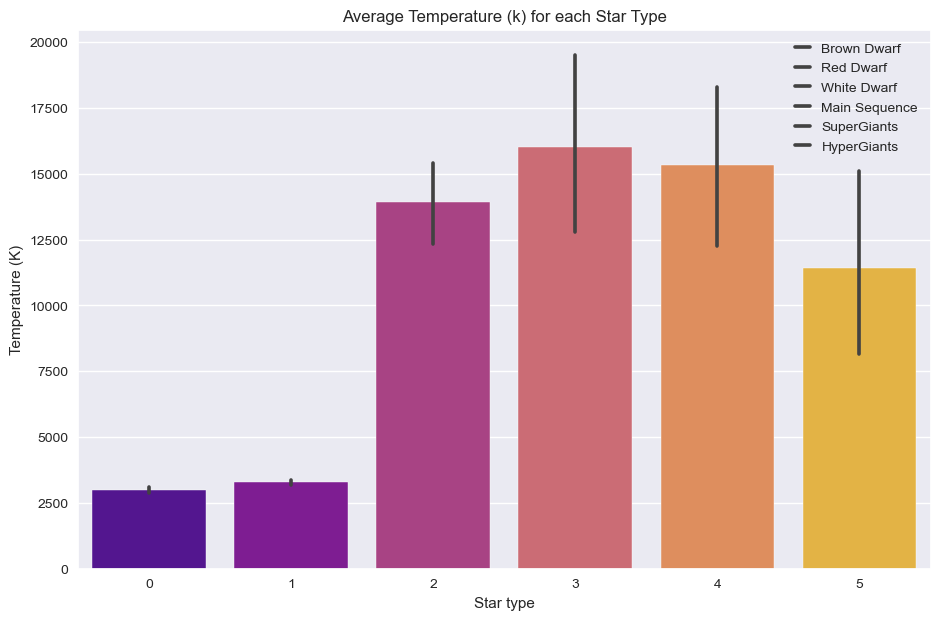

In [14]:
plt.figure(figsize = (11,7))
plt.title('Average Temperature (k) for each Star Type')
sns.barplot(x = df['Star type'], y = df['Temperature (K)'], palette=sns.color_palette("plasma"))
plt.legend(["Brown Dwarf", "Red Dwarf", "White Dwarf", "Main Sequence", "SuperGiants", "HyperGiants"], fancybox=True, edgecolor="black", handlelength=1.1)
plt.ylabel('Temperature (K)');

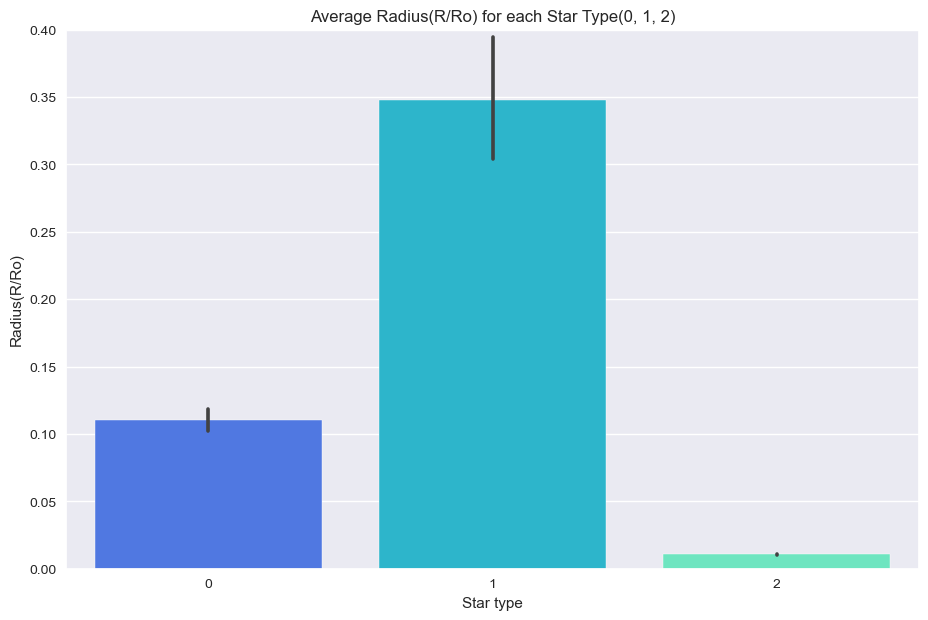

In [15]:
plt.figure(figsize = (11,7))
plt.title('Average Radius(R/Ro) for each Star Type(0, 1, 2)')
sns.barplot(x = df['Star type'], y = df['Radius(R/Ro)'], palette=sns.color_palette("rainbow"))
plt.ylabel('Radius(R/Ro)')
plt.ylim((0,0.4))
plt.xlim((-0.5, 2.5));

(2.5, 5.5)

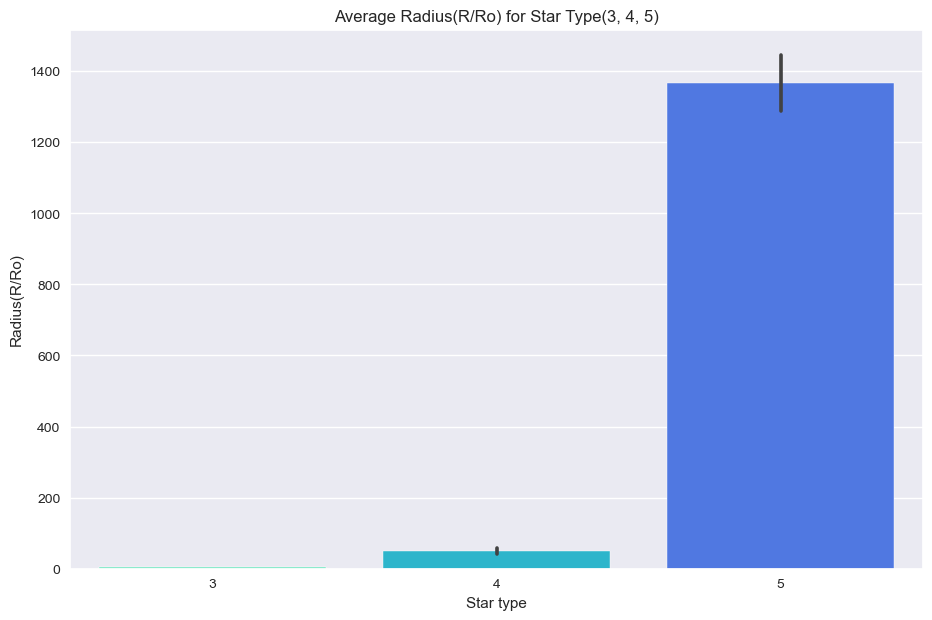

In [16]:
plt.figure(figsize = (11,7))
plt.title('Average Radius(R/Ro) for Star Type(3, 4, 5)')
sns.barplot(x = df['Star type'], y = df['Radius(R/Ro)'], palette=sns.color_palette("rainbow_r"))
plt.ylabel('Radius(R/Ro)')
plt.xlim((2.5, 5.5))

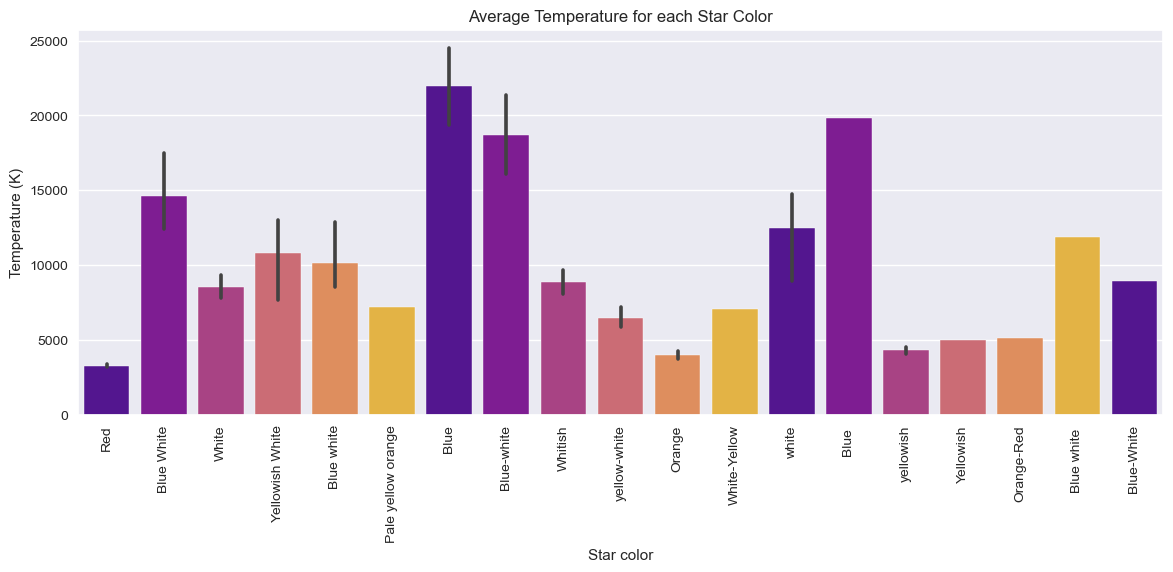

In [17]:
plt.figure(figsize = (14,5))
plt.title('Average Temperature for each Star Color')
sns.barplot(x = df['Star color'], y = df['Temperature (K)'], palette=sns.color_palette("plasma"))
plt.xticks(rotation=90);

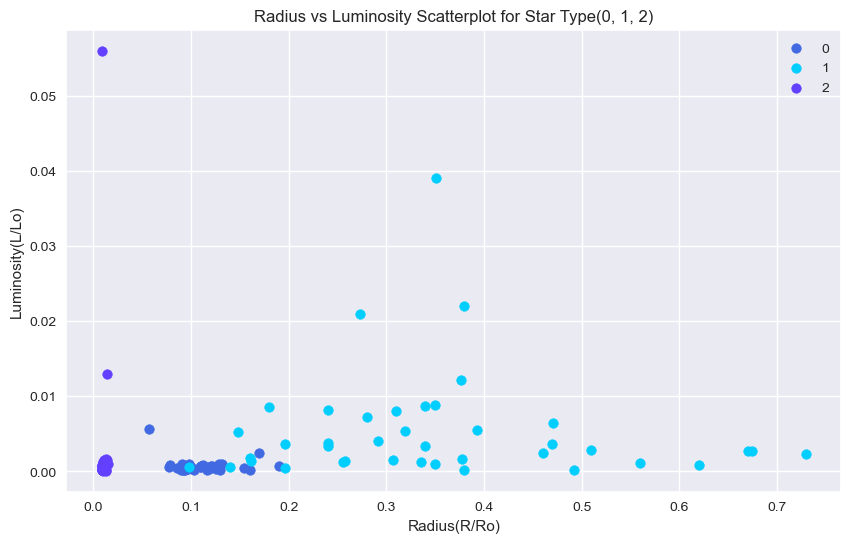

In [18]:
plt.figure(figsize = (10,6))
plt.title("Radius vs Luminosity Scatterplot for Star Type(0, 1, 2)")
plt.scatter(x = df[df["Star type"] == 0]["Radius(R/Ro)"], y = df[df["Star type"] == 0]["Luminosity(L/Lo)"], color = 'royalblue', label = '0')
plt.scatter(x = df[df["Star type"] == 1]["Radius(R/Ro)"], y = df[df["Star type"] == 1]["Luminosity(L/Lo)"], color = '#00ceff', label = '1')
plt.scatter(x = df[df["Star type"] == 2]["Radius(R/Ro)"], y = df[df["Star type"] == 2]["Luminosity(L/Lo)"], color = '#6340ff', label = '2')
plt.legend()
plt.xlabel("Radius(R/Ro)")
plt.ylabel("Luminosity(L/Lo)");

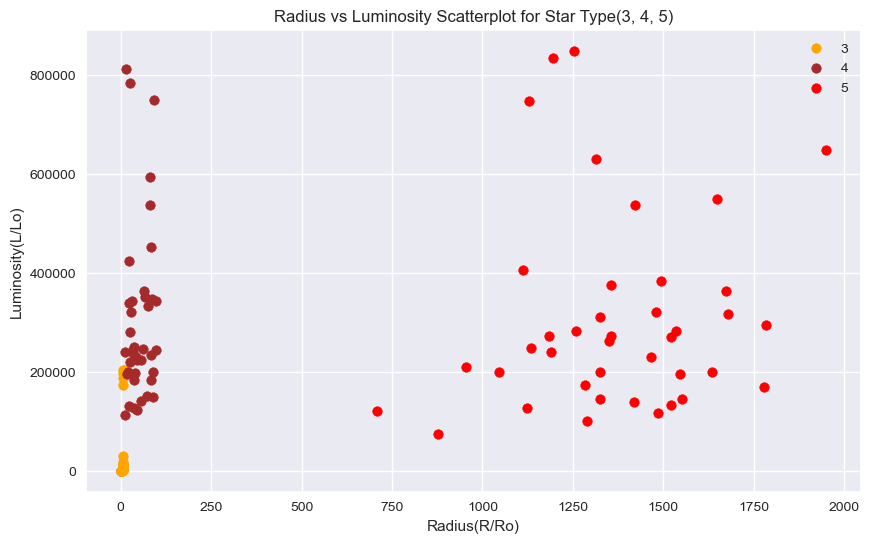

In [19]:
plt.figure(figsize = (10,6))
plt.title("Radius vs Luminosity Scatterplot for Star Type(3, 4, 5)")
plt.scatter(x = df[df["Star type"] == 3]["Radius(R/Ro)"], y = df[df["Star type"] == 3]["Luminosity(L/Lo)"], color = 'orange', label = '3')
plt.scatter(x = df[df["Star type"] == 4]["Radius(R/Ro)"], y = df[df["Star type"] == 4]["Luminosity(L/Lo)"], color = 'brown', label = '4')
plt.scatter(x = df[df["Star type"] == 5]["Radius(R/Ro)"], y = df[df["Star type"] == 5]["Luminosity(L/Lo)"], color = 'red', label = '5')
plt.legend()
plt.xlabel("Radius(R/Ro)")
plt.ylabel("Luminosity(L/Lo)");

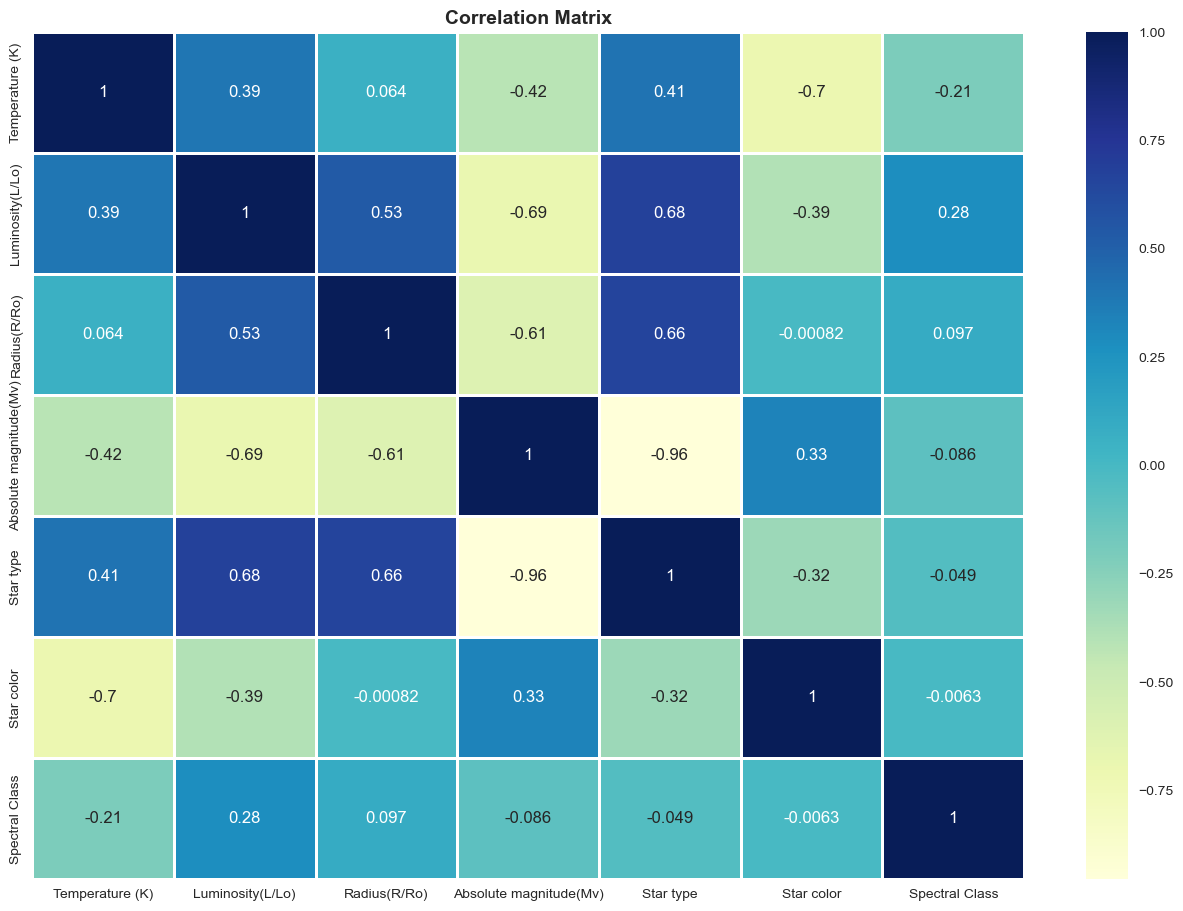

In [20]:
## Convert categorical features to numerical using Label encoding
df['Star color'] = LabelEncoder().fit_transform(df['Star color'])
df['Spectral Class'] = LabelEncoder().fit_transform(df['Spectral Class'])

# Making a Correlation Matrix
corr_matrix = df.iloc[:, :8].corr()
fig, ax = plt.subplots(figsize=(16, 11))
ax = sns.heatmap(corr_matrix,
                 annot=True, 
                 linewidths=1,
                 cmap="YlGnBu");
plt.title('Correlation Matrix',fontsize=14, fontweight="bold");

## Machine Learning

In [21]:
# Spliting data into X and y
X = df.drop(['Star type'],axis=1)
y = df['Star type']

# Setup random seed
np.random.seed(50)

# Split data into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
# Setup random seed
np.random.seed(50)

# Using lazypredict to run through different models
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.92it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 245
[LightGBM] [Info] Number of data points in the train set: 168, number of used features: 6
[LightGBM] [Info] Start training from score -1.722767
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -1.756668
[LightGBM] [Info] Start training from score -1.865867
[LightGBM] [Info] Start training from score -1.756668
[LightGBM] [Info] Start training from score -1.627456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [23]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,1.00,1.00,None,1.00,0.03
XGBClassifier,1.00,1.00,None,1.00,0.12
RandomForestClassifier,1.00,1.00,None,1.00,0.15
DecisionTreeClassifier,0.99,0.99,None,0.99,0.01
ExtraTreesClassifier,0.99,0.99,None,0.99,0.11
KNeighborsClassifier,0.97,0.97,None,0.97,0.01
LGBMClassifier,0.94,0.96,None,0.95,0.14
SGDClassifier,0.97,0.96,None,0.97,0.01
PassiveAggressiveClassifier,0.96,0.96,None,0.96,0.01


In [24]:
# Setup random seed
np.random.seed(50)

et = ExtraTreesClassifier()
et.fit(X_train, y_train)

y_preds = et.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         7

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



### 10-Fold Cross Validation Metrics

In [25]:
## Create a function to evaluate the models
def evaluate_preds(model, X, y):
    
    accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=10, scoring='precision_macro').mean()
    recall = cross_val_score(model, X, y, cv=10, scoring='recall_macro').mean()
    f1 = cross_val_score(model, X, y, cv=10, scoring='f1_macro').mean()
    
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [26]:
evaluate_preds(et,X,y);

Accuracy: 98.75%
Precision: 0.99
Recall: 0.99
F1 score: 0.99


### Confusion matrix , ROC Curves and Feature Importance

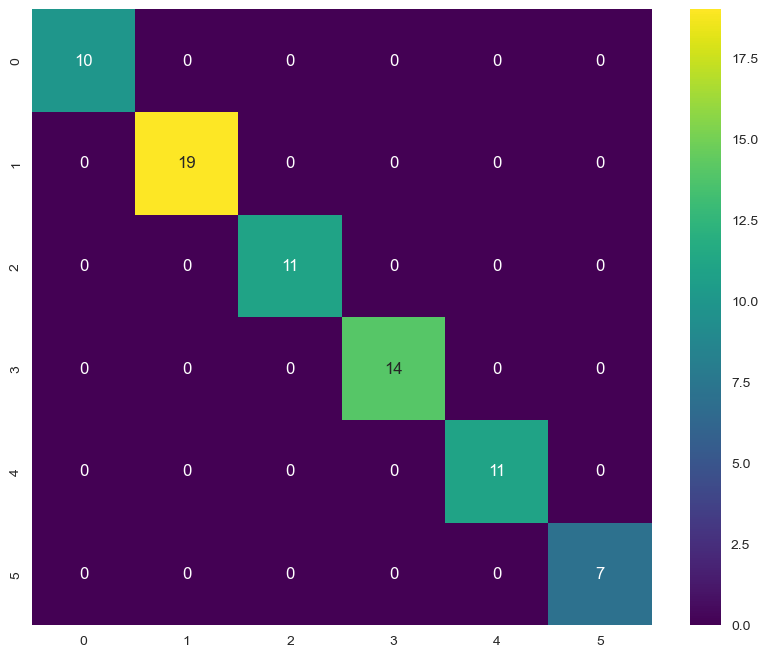

In [27]:
# Making a Confusion Matrix
ConfusionMatrix = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(ConfusionMatrix, cmap="viridis", annot=True);

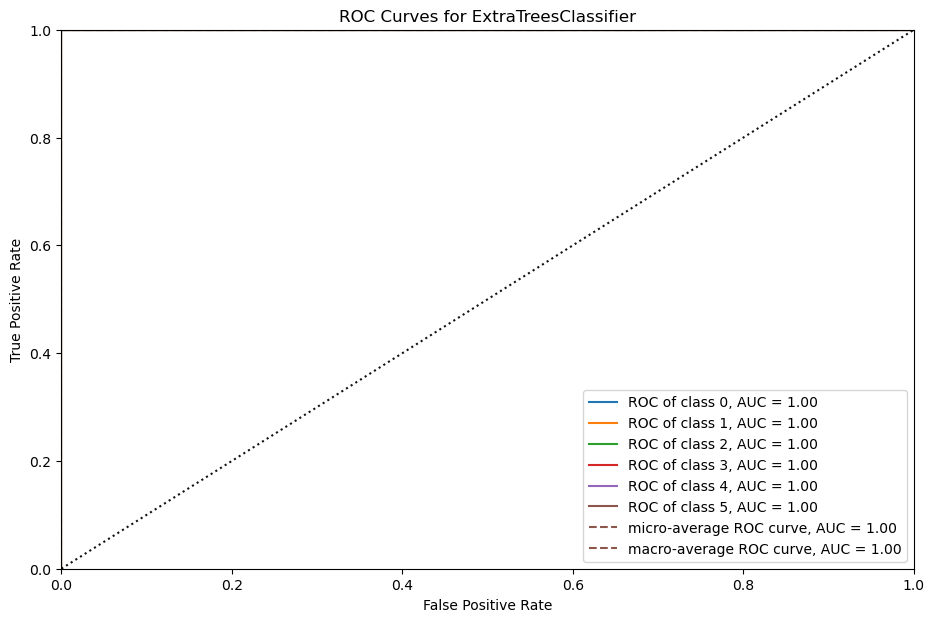

In [28]:
#Choose a style for the plot
plt.style.use("default")

# Ploting Multi-class ROC Curves
plt.figure(figsize=(11,7))
visualizer = ROCAUC(et)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [29]:
# Function for plotting feature importance
def plot_features(columns, importances, n=25):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots(figsize=(11, 8))
    ax.barh(df["features"][:n], df["feature_importances"][:25], color="royalblue", edgecolor='black')
    ax.set_title('Feature importance', fontsize=14, fontweight="bold")
    ax.invert_yaxis()

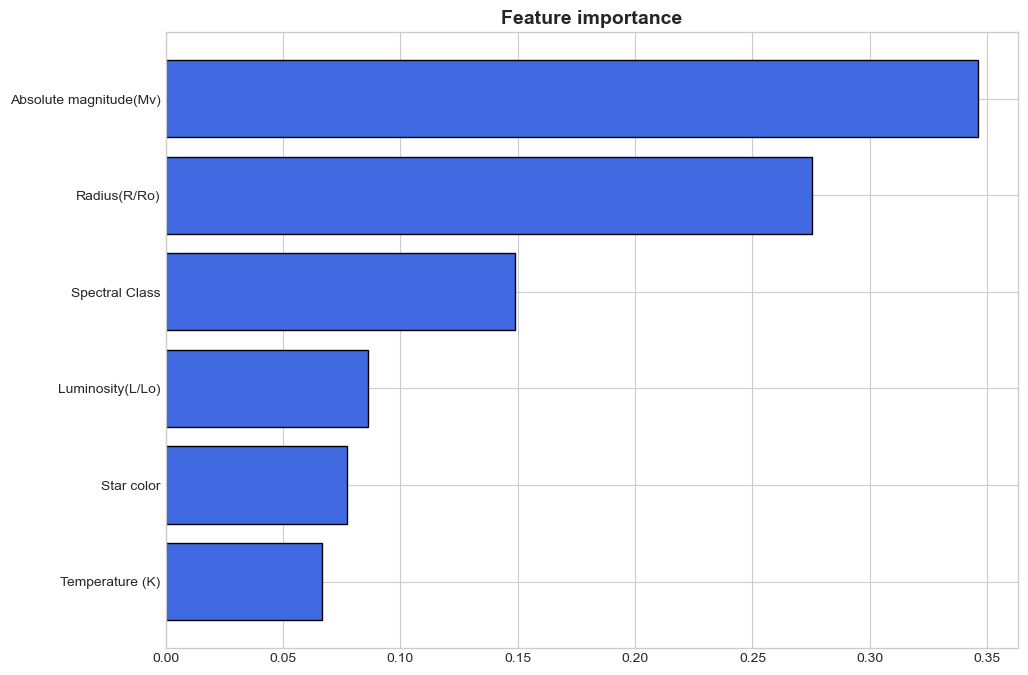

In [30]:
plt.style.use("seaborn-v0_8-whitegrid")
plot_features(X_train.columns, et.feature_importances_)